In [1]:
pip install fuzzywuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import os
import pandas as pd
import numpy as np
from fuzzywuzzy import fuzz
from fuzzywuzzy import process
import spacy
from matplotlib import pyplot as plt
from sklearn .feature_extraction.text import *

/usr/local/lib/python3.7/dist-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [3]:
df=pd.read_csv('https://raw.githubusercontent.com/DavidGlezGmz/Natural-Language-Processing-NLP-/main/Fuzzy%20Matching%20Raw%20Data.csv')
matching_brands={'Brands':['Coca-Cola','Amazon','Scientist']}
matches=pd.DataFrame(matching_brands)

In [4]:
data=df['Data'].tolist()
match=matches['Brands'].tolist()

In [5]:
match

['Coca-Cola', 'Amazon', 'Scientist']

In [6]:
threshold=80

In [7]:
mat=[]
for dta in data:
  mat.append(process.extract(dta,match,limit=1))
df['Matches']=mat

df

,Data,Matches
0,amazon.com,"[(Amazon, 90)]"
1,ammazon.com,"[(Amazon, 75)]"
2,amizon.com,"[(Amazon, 75)]"
3,amazzon.com,"[(Amazon, 75)]"
4,amazon.clm,"[(Amazon, 90)]"
...,...,...
58,cocaa-cola,"[(Coca-Cola, 95)]"
59,cokacola,"[(Coca-Cola, 82)]"
60,cokacoal,"[(Coca-Cola, 71)]"
61,cocoa-cola,"[(Coca-Cola, 95)]"


In [8]:
inter_mathcing=[]

for dta in data:
  inter_mathcing.append((process.extract(dta,data,limit=len(df))))
df['Internal Matches']=inter_mathcing

In [9]:
df

,Data,Matches,Internal Matches
0,amazon.com,"[(Amazon, 90)]","[(amazon.com, 100), (ammazon.com, 95), (amazzo..."
1,ammazon.com,"[(Amazon, 75)]","[(ammazon.com, 100), (amazon.com, 95), (amazzo..."
2,amizon.com,"[(Amazon, 75)]","[(amizon.com, 100), (amazon.com, 90), (amezon...."
3,amazzon.com,"[(Amazon, 75)]","[(amazzon.com, 100), (amazon.com, 95), (ammazo..."
4,amazon.clm,"[(Amazon, 90)]","[(amazon.clm, 100), (amazon.com, 90), (amaozn...."
...,...,...,...
58,cocaa-cola,"[(Coca-Cola, 95)]","[(cocaa-cola, 100), (coca-cola, 95), (cocca-co..."
59,cokacola,"[(Coca-Cola, 82)]","[(cokacola, 100), (coka-cola, 94), (cooka-cola..."
60,cokacoal,"[(Coca-Cola, 71)]","[(cokacoal, 100), (coka-coal, 94), (cooka-coal..."
61,cocoa-cola,"[(Coca-Cola, 95)]","[(cocoa-cola, 100), (coca-cola, 95), (coco-col..."


In [10]:
df['Internal Matches'][0][0][0]

'amazon.com'

In [11]:
df.columns

Index(['Data', 'Matches', 'Internal Matches'], dtype='object')

In [12]:
import nltk
import difflib


nltk.edit_distance("humpty", "dumpty")


C = []

for i in range (len(data)):
  count = -1
  for j in range (len(data)):
    a = data[j]
    b = data[i]
    seq = difflib.SequenceMatcher(None,a,b)
    d = int(seq.ratio()*100)

    if d>=80:
      count += 1

    #print(data[i], d) 


  C.append(count)

df['Count']=C

In [13]:
df

,Data,Matches,Internal Matches,Count
0,amazon.com,"[(Amazon, 90)]","[(amazon.com, 100), (ammazon.com, 95), (amazzo...",17
1,ammazon.com,"[(Amazon, 75)]","[(ammazon.com, 100), (amazon.com, 95), (amazzo...",15
2,amizon.com,"[(Amazon, 75)]","[(amizon.com, 100), (amazon.com, 90), (amezon....",14
3,amazzon.com,"[(Amazon, 75)]","[(amazzon.com, 100), (amazon.com, 95), (ammazo...",15
4,amazon.clm,"[(Amazon, 90)]","[(amazon.clm, 100), (amazon.com, 90), (amaozn....",15
...,...,...,...,...
58,cocaa-cola,"[(Coca-Cola, 95)]","[(cocaa-cola, 100), (coca-cola, 95), (cocca-co...",11
59,cokacola,"[(Coca-Cola, 82)]","[(cokacola, 100), (coka-cola, 94), (cooka-cola...",6
60,cokacoal,"[(Coca-Cola, 71)]","[(cokacoal, 100), (coka-coal, 94), (cooka-coal...",7
61,cocoa-cola,"[(Coca-Cola, 95)]","[(cocoa-cola, 100), (coca-cola, 95), (coco-col...",13


In [14]:
df.columns


Index(['Data', 'Matches', 'Internal Matches', 'Count'], dtype='object')

In [15]:
d={'name':[],'count':[],'matches':[],'group':[]}
counts_df=pd.DataFrame(data=d)

In [16]:
counts_df

,name,count,matches,group


In [17]:
group_dict={}

In [18]:
group_dict={0:[]}

In [19]:
group_dict[1]=[1,2,3]
group_dict[2]=[3,4,5]

In [20]:
group_dict

{0: [], 1: [1, 2, 3], 2: [3, 4, 5]}

In [21]:
for element in group_dict:
  print(group_dict[element])

[]
[1, 2, 3]
[3, 4, 5]


In [22]:
def  group_and_count(df,threshold): 

    threshold=threshold
    df = df
    group_dict={}

    d={'name':[],'count':[],'matches':[],'group':[]}
    counts_df=pd.DataFrame(data=d)

    for row in df.iloc():
      list_elements=[]
      for element in row['Internal Matches']:
        if element[1]>threshold:
          #print(element)
          list_elements.append(element[0])

      group=0
      for element in group_dict:
        if set(group_dict[element]) & set(list_elements):
          new_list=set(group_dict[element]+list_elements)
          group=element
          group_dict[group]=list(new_list)
      if group == 0:
        group = len(group_dict)+1
        group_dict[group]=list_elements
      #print(list_elements)
      #print('next:',row['Data'],' count:',len(list_elements),' Group:',group ) 
      counts_df=counts_df.append({'name':row['Data'],'count':len(list_elements),'matches':list_elements,'group':group},ignore_index=True)
    idx=counts_df.groupby(['group'], sort=False)['count'].transform(max)==counts_df['count']
    return counts_df[idx],counts_df,group_dict

In [23]:
top_words,counts_df,groups = group_and_count(df,70)

In [24]:
top_words

,name,count,matches,group
0,amazon.com,21.0,"[amazon.com, ammazon.com, amazzon.com, aamazon...",1.0
9,amazon..com,21.0,"[amazon..com, amazon.com, ammazon.com, amazzon...",1.0
23,scientest,21.0,"[scientest, scienteist, scientist, scientsit, ...",2.0
42,coca-cola,20.0,"[coca-cola, cocca-cola, coca-colla, cocaa-cola...",3.0
57,coca-coa,20.0,"[coca-coa, coca-cola, coca-coal, cocca-cola, c...",3.0
59,cokacola,20.0,"[cokacola, coka-cola, cooka-cola, cocacola, co...",3.0


In [25]:
groups={}

words_array = np.zeros(60)
group_array = np.zeros(60)
for i in range(40,100):
  top_words,counts_df,groups = group_and_count(df,i)
  
  print('threshold: ',i,'number of top words:', len(top_words),' max groups:', len(groups))
  X = len(top_words)
  words_array[i - 40] = len(top_words)
  group_array[i - 40] = len(groups)


threshold:  40 number of top words: 17  max groups: 2
threshold:  41 number of top words: 17  max groups: 2
threshold:  42 number of top words: 17  max groups: 2
threshold:  43 number of top words: 17  max groups: 2
threshold:  44 number of top words: 16  max groups: 2
threshold:  45 number of top words: 16  max groups: 2
threshold:  46 number of top words: 16  max groups: 2
threshold:  47 number of top words: 25  max groups: 2
threshold:  48 number of top words: 19  max groups: 2
threshold:  49 number of top words: 19  max groups: 2
threshold:  50 number of top words: 10  max groups: 2
threshold:  51 number of top words: 10  max groups: 2
threshold:  52 number of top words: 10  max groups: 2
threshold:  53 number of top words: 39  max groups: 3
threshold:  54 number of top words: 39  max groups: 3
threshold:  55 number of top words: 39  max groups: 3
threshold:  56 number of top words: 30  max groups: 3
threshold:  57 number of top words: 30  max groups: 3
threshold:  58 number of top

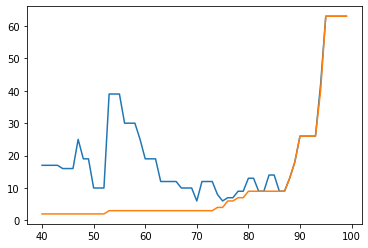

In [26]:

plt.figure()
plt.plot(range(40, 100), (words_array))
plt.plot(range(40, 100), (group_array))

In [27]:
print(groups.keys())

dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63])


In [28]:
idx=counts_df.groupby(['group'], sort=False)['count'].transform(max)==counts_df['count']

In [29]:
counts_df[idx]

,name,count,matches,group
0,amazon.com,1.0,[amazon.com],1.0
1,ammazon.com,1.0,[ammazon.com],2.0
2,amizon.com,1.0,[amizon.com],3.0
3,amazzon.com,1.0,[amazzon.com],4.0
4,amazon.clm,1.0,[amazon.clm],5.0
...,...,...,...,...
58,cocaa-cola,1.0,[cocaa-cola],59.0
59,cokacola,1.0,[cokacola],60.0
60,cokacoal,1.0,[cokacoal],61.0
61,cocoa-cola,1.0,[cocoa-cola],62.0


In [30]:
group_dict

{0: [], 1: [1, 2, 3], 2: [3, 4, 5]}

In [31]:
for element in group_dict:
  print(group_dict[element])

[]
[1, 2, 3]
[3, 4, 5]
